# Faktor Apakah yang Menjual Sebuah Mobil?

Ratusan iklan kendaraan gratis ditayangkan di situs web Crankshaft List setiap hari. Seorang analis di Crankshaft List perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang mempengaruhi harga sebuah kendaraan.

Tujuan dari project ini adalah untuk mengetahui bagaimana faktor berikut ini mempengaruhi harga jual mobil pada umumnya:
1. Jarak tempuh
2. Usia
3. Warna cat
4. Jenis transmisi

Untuk dapat menarik kesimpulan di atas, tahapan proses dalam project ini adalah:
1. Pra-pemrosesan data
2. Mengatasi nilai-nilai yang hilang
3. Memperbaiki tipe dan kualitas data
4. Mempelajari parameter inti
5. Menyingkirkan outliers dan kembali mempelajari parameter inti tanpa outliers
6. Menarik kesimpulan berapa lama iklan pada umumnya ditayangkan untuk menentukan batas minimal lamanya iklan sebagai pertimbangan untuk melibatkan data ke dalam analisa.
7. Menarik kesimpulan harga umumnya tiap tipe mobil
8. Menganalisa hubungan terhadap harga mobil dari 4 faktor yang menjadi tujuan project ini

## Pra-pemrosesan

Memuat *library* yang dibutuhkan

In [564]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Memuat Data

In [565]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [566]:
# Muat file data menjadi DataFrame
path = '/content/gdrive/MyDrive/data_projects/vehicles_us.csv'
car_ads = pd.read_csv(path)


### Mengeksplorasi Data Awal

*Dataset* berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [567]:
# tampilkan informasi/rangkuman umum tentang DataFrame
car_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [568]:
# tampilkan sampel data
car_ads.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [569]:
# memuat deskripsi statistik
car_ads.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [570]:
# memeriksa distribusi nilai di tiap kolom
for column in car_ads.columns:
    print(car_ads[column].value_counts(dropna=False))
    

1        798
6995     719
5995     655
4995     624
3500     620
        ... 
58500      1
3993       1
32987      1
3744       1
7455       1
Name: price, Length: 3443, dtype: int64
NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: model_year, Length: 69, dtype: int64
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage      

In [571]:
#memeriksa baris duplikat
car_ads.duplicated().sum()

0

Dari info terlihat banyak nilai hilang. Beberapa tipe data tidak sesuai dengan nilainya, yaitu di kolom is_4wd, cylinders, model_year, dan date_posted.

Tipe data untuk pertanyaan apakah kendaraan merupakan *four-wheel drives* seharusnya boolean. Tahun dan jumlah silinder juga seharusnya integer. Dan tanggal seharusnya datetime.

In [572]:
#memeriksa jumlah nilai hilang
car_ads.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Nilai hilang ada di 5 kolom: model_year, cylinders, is_4wd, odometer, dan paint_color. Kolom paling banyak adalah is_4wd. Ini berarti sekitar 50% dari total baris.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Tidak ada data duplikat.
Nilai hilang paling banyak terdapat pada kolom fitur four-wheel drive. Ini adalah tipe data boolean. Jika semua nilai yang terisi adalah boolean 1, kita bisa menganggap nilai hilang adalah untuk nilai boolean 0 atau False.

Sedangkan jumlah silinder tidak sedang menjadi variable hipotesis, kita mungkin bisa dengan membiarkan nilai lain.

Namun tidak demikian dengan kolom lain yang mengandung nilai hilang, yaitu model_year, odometer, dan paint_color. Dalam analisa ini kita akan menguji pengaruh faktor umur mobil, odometer, kondisi, transmisi, dan warna cat terhadap harga. Dengan begitu nilai hilang pada kolom model_year, odometer, dan paint_color perlu dianalisa dengan baik sebelum memutuskan cara menanganinya.


## Mengatasi Nilai-Nilai yang Hilang

Menangani nilai hilang di kolom is_4wd.

In [573]:
# memeriksa nilai di kolom is_4wd
car_ads['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

Kita mendapatkan bahwa nilai di is_4wd seluruhnya berisi boolean 1. Mari menggantikan nilai hilang pada kolom is_4wd dengan boolean 0 seperti dengan pemikiran bahwa nilai hilang sebetulnya merupakan boolean 0.

In [574]:
#mengganti nilai hilang dengan 0
car_ads['is_4wd'] = car_ads['is_4wd'].fillna(0)

In [575]:
#memeriksa lagi kolom is_4wd
car_ads['is_4wd'].value_counts(dropna=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Selanjutnya mari menangani nilai hilang kolom model_year. Pada kolom model_year, nilai hilang adalah yang paling banyak porsinya dalam hal distribusi nilai. Maka penting untuk memikirkan cara mengisinya. Untuk tidak banyak menggeser distribusi data demi proses Exploratory Data Analysis (EDA), nilai hilang akan diisi dengan median berdasarkan kelompok model yang ada. Sebuah kolom baru yang memuat kolom di mana nilai kosong diisi dengan median tersebut akan dibuat. Juga dengan begitu model_year bisa digunakan untuk menghitung usia mobil saat iklan ditayangkan. Median dipilih dibanding mean karena banyaknya outliers dalam data model_year.

In [576]:
# memeriksa distribusi nilai 10 terbanyak di model_year
car_ads['model_year'].value_counts(dropna=False, normalize=True).head(10)

NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
2015.0    0.064493
2016.0    0.057331
2008.0    0.056749
2010.0    0.052227
2007.0    0.051295
Name: model_year, dtype: float64

In [577]:
# memeriksa median menurut model
car_ads.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

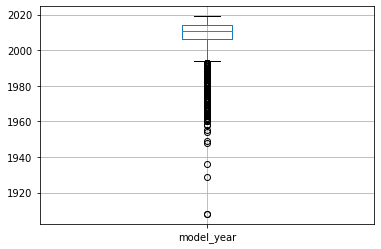

In [578]:
# memeriksa outliers pada model_year
car_ads.boxplot('model_year')

In [579]:
# menulis fungsi yang akan digunakan untuk mengisi nilai hilang pada kolom yang sudah ada
def fill_na(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for n in range(size):
        group = grouped_values[agg_column][n]
        value = grouped_values[value_column][n]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [580]:
# menerapkan fungsi untuk mengisi nilai hilang di model_year
car_ads = fill_na(data=car_ads, agg_column='model', 
                              value_column='model_year')


In [581]:
# memuat info data
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [582]:
car_ads['model_year'].describe()

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

Terlihat distribusi nilai di model_year tidak berubah signifikan. Nilai hilang telah terisi namun distribusi tidak terpengaruh banyak. Ini dikarenakan nilai typical yang digunakan adalah median per kelompok model.

Selanjutnya mari menangani nilai hilang kolom `odometer`.

Pada kolom `odometer`, nilai hilang adalah yang paling banyak porsinya. Dari data yang tersedia, faktor yang paling baik memproksikan jarak tempuh sebuah mobil adalah kondisi. Sehingga nilai hilang odometer akan diisi dengan mediannya berdasarkan condition. Dengan memilih hal ini, distribusi data tidak terdistorsi ketika signifikan.

In [583]:
# memeriksa distribusi nilai di odometer
car_ads['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [584]:
# menerapkan fungsi untuk mengisi nilai hilang di odometer
car_ads = fill_na(data=car_ads, agg_column='condition', 
                              value_column='odometer')


In [585]:
# memeriksa kembali distribusi nilai di odometer setelah nilai hilang diisi
car_ads['odometer'].describe()

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

Selanjutnya mari menangani nilai hilang kolom `cylinders`.

Pada kolom `cylinders`, porsi nilai hilang 10%. Setiap mobil pasti memiliki cylinder. Dari data yang tersedia, faktor yang paling terkait dengan cylinders adalah `model`. Karena itu, nilai hilang akan diisi menggunakan data typical berdasarkan `model`. Median akan digunakan sebagai pengganti nilai hilang karena bentuk data yang merupakan ordinal.

In [586]:
# memeriksa distribusi nilai 10 terbanyak di cylinders
car_ads['cylinders'].value_counts(dropna=False,normalize=True).head(10)

8.0     0.307501
6.0     0.304706
4.0     0.269073
NaN     0.102086
10.0    0.010655
5.0     0.005279
3.0     0.000660
12.0    0.000039
Name: cylinders, dtype: float64

Untuk memutuskan mengisi nilai hilang `cylinders`, mari lihat apakah jumlah cylinders tertentu mendominasi tiap model yang ada, yaitu dengan cara melihat distribusi nilai cylinders pada beberapa sample model.

In [587]:
# memeriksa top-3 model pada baris cylinders dengan nilai hilang

car_ads.loc[car_ads['cylinders'].isna()]['model'].value_counts().head(3)

ford f-150                  316
chevrolet silverado 1500    231
ram 1500                    185
Name: model, dtype: int64

In [588]:
# memeriksa distribusi cylinders di model `ford f-150`
car_ads.query('model == "ford f-150"')['cylinders'].value_counts()

8.0     1584
6.0      863
10.0      18
4.0       11
3.0        2
5.0        2
Name: cylinders, dtype: int64

In [589]:
# memeriksa distribusi cylinders di model `chevrolet silverado 1500`
car_ads.query('model == "chevrolet silverado 1500"')['cylinders'].value_counts()

8.0     1714
6.0      219
4.0        4
10.0       3
Name: cylinders, dtype: int64

In [590]:
# memeriksa distribusi cylinders di model `ram 1500`
car_ads[car_ads['model'] == 'ram 1500']['cylinders'].value_counts()

8.0     1348
6.0      199
10.0      17
4.0        1
Name: cylinders, dtype: int64

Dari 3 sample ditemukan bahwa model memiliki jumlah cylinders tertentu yang mendominasi . Karena itu, median jumlah cylinders menurut model akan digunakan untuk mengisi nilai hilang cylinders. Sekaligus untuk tidak banyak menggeser distribusi data keseluruhan.

In [591]:
# Mengisi nilai hilang dengan menerapkan fungsi fill_na ke nilai hilang di cylinders
car_ads = fill_na(data=car_ads,
                         agg_column='model',
                         value_column='cylinders')

In [592]:
# memeriksa distribusi nilai 10 terbanyak di cylinders
car_ads['cylinders'].value_counts(dropna=False,normalize=True).head(10)

8.0     0.343755
6.0     0.338379
4.0     0.300805
10.0    0.010655
5.0     0.005706
3.0     0.000660
12.0    0.000039
Name: cylinders, dtype: float64

Terlihat distribusi nilai di cylinders tidak berubah signifikan. Nilai hilang telah terisi namun distribusi tidak terpengaruh banyak. Ini dikarenakan nilai typical yang digunakan adalah median per kelompok model.

Selanjutnya mari menangani nilai hilang di `paint_color`. Warna mobil tidak bisa dikaitkan dengan model atau pun faktor lain. Dan faktor ini akan dianalisa pengaruhnya terhadap harga. Agar tidak mengganggu ditribusi data, `unknown` akan digunakan untuk mengisi nilai hilang.

In [593]:
# memeriksa distribusi nilai di paint_color
car_ads['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [594]:
# mengisi nilai hilang dengan unknown
car_ads['paint_color'] = car_ads['paint_color'].fillna('unknown')

In [595]:
# memeriksa lagi jumlah nilai hilang
car_ads.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Memperbaiki Tipe Data

Data telah lengkap, saatnya memperbaiki tipe data.

In [596]:
# mengubah tipe data model_year_0, model_year_median, is_4wd, dan cylinders menjadi integer
car_ads['model_year'] = car_ads['model_year'].astype('int')
car_ads['is_4wd'] = car_ads['is_4wd'].astype('bool')
car_ads['cylinders'] = car_ads['cylinders'].astype('int')


In [597]:
# mengubah tipe data tanggal menjadi timestamp.
car_ads['date_posted'] = pd.to_datetime(car_ads['date_posted'], format='%Y-%m-%d')


In [598]:
# memuat info umum car_ads
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


Nilai hilang sudah ditangani dan tipe data sudah disesuaikan pada tiap kolom yang diperlukan untuk EDA dan feature engineering untuk analisa selanjutnya.

## Memperbaiki Kualitas Data

Data akan ditambahkan dengan faktor-faktor lain yang diperlukan agar lebih mudah dianalisis.

In [599]:
# memuat sample data
car_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [600]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
car_ads['day_name_posted'] = car_ads['date_posted'].dt.day_name()
car_ads['day_posted'] = car_ads['date_posted'].dt.day
car_ads['month_posted'] = car_ads['date_posted'].dt.month
car_ads['month_name_posted'] = car_ads['date_posted'].dt.month_name()
car_ads['year_posted'] = car_ads['date_posted'].dt.year


In [601]:
# Tambahkan usia kendaraan saat iklan ditayangkan
car_ads['age'] = car_ads['year_posted'] - car_ads['model_year']

In [602]:
# Mengisi nilai age 0 dengan 1, agar bisa digunakan menjadi denominator pembagi odometer rata-rata per tahun
car_ads.loc[car_ads['age'] < 1, 'age'] = 1


In [603]:
# memeriksa bila masih ada usia yang 0
car_ads[car_ads['age'] < 1]['age']

Series([], Name: age, dtype: int64)

In [604]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
car_ads['odometer_annual'] = car_ads['odometer']/car_ads['age']

In [605]:
# memeriksa nilai di condition
car_ads.condition.unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [606]:
car_ads.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [607]:
# Mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
car_ads['condition'] = car_ads['condition'].map({'good':2, 'like new':4, 'fair':1, 
                                                 'excellent':3, 'salvage':0, 'new':5})
    


In [608]:
# menerapkan fungsi replace_condition
car_ads['condition'].value_counts()


3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Memeriksa Data yang Sudah Bersih

Data yang bersih dilihat lagi.

In [609]:
# tampilkan informasi/rangkuman umum tentang DataFrame
car_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  day_name_posted    51525 non-null  object        
 14  day_po

In [610]:
# tampilkan sampel data 
car_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,19,10,October,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,22,3,March,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000


## Mempelajari Parameter Inti 
Parameternya yang akan dipelajari adalah:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

Untuk parameter numerikal ratio dan interval, yaitu: price, age, odometer, histogram akan digunakan.

Sedangkan untuk parameter kategorikal ordinal, yaitu: cylinders, condition, countplot akan digunakan.

Dan untuk memeriksa kehadiran outliers, boxplot akan digunakan untuk menggambarkan distribusi di setiap parameter.

Fungsi akan didefinisikan agar coding tidak perlu ditulis berulang.

In [611]:
# memuat deskripsi statistik
car_ads.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,39.55476,15.449491,6.628491,2018.307462,8.555672,18930.822069
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,28.20427,8.736521,3.474134,0.461447,6.057829,16268.514686
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000


In [612]:
# membuat fungsi boxplot menggunakan loop
def create_boxplot(df, columns):
    plt.subplots(figsize = (20, 16))
    for i, column in enumerate(columns):
        sns.boxplot(data=df, x=column, ax = plt.subplot(2, len(columns)-2, i + 1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')


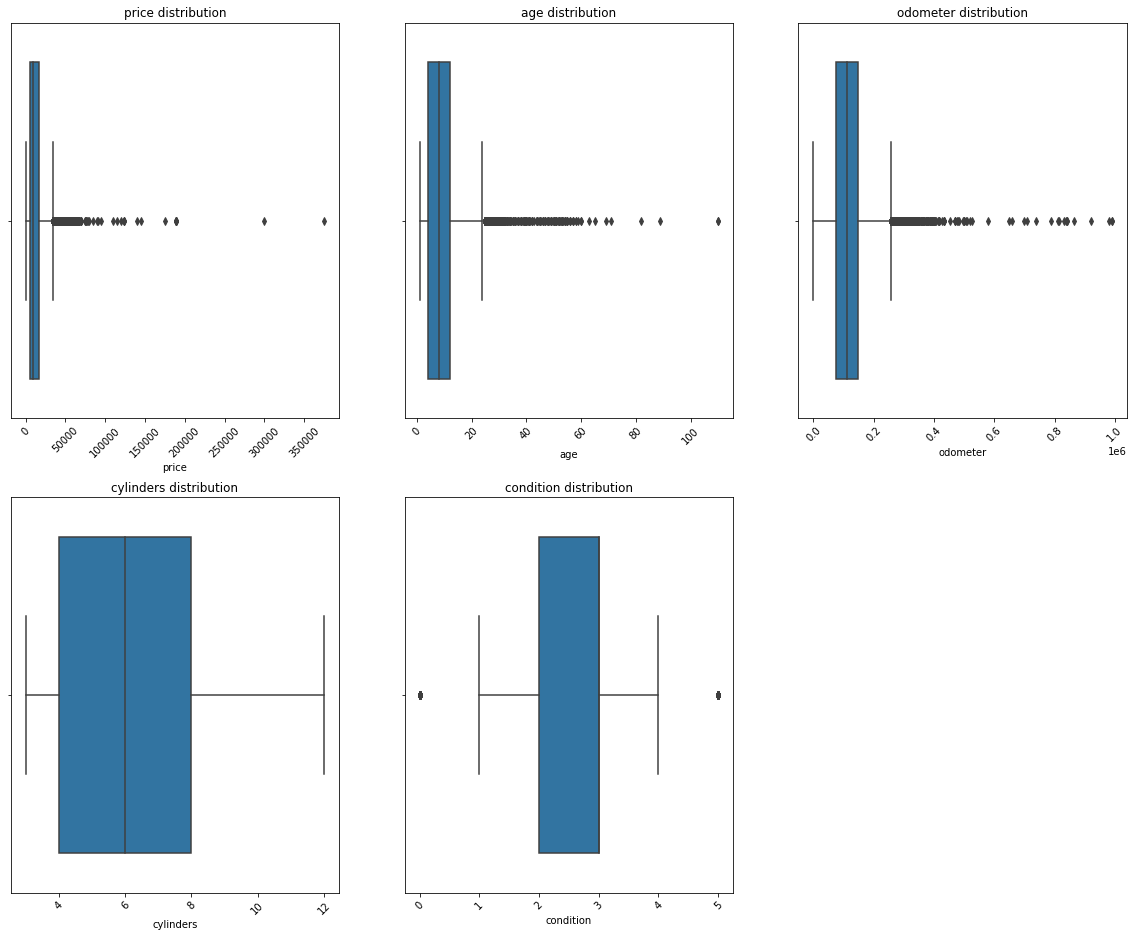

In [613]:
# memuat boxplot untuk setiap parameter menggunakan fungsi create_boxplot
parameters = ('price', 'age', 'odometer', 'cylinders', 'condition')
create_boxplot(car_ads, parameters)

In [614]:
# membuat fungsi histplot menggunakan loop
def create_histplot(df, columns):
    plt.subplots(figsize = (16, 4))
    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, ax = plt.subplot(1, len(columns), i+1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')


In [615]:
# membuat fungsi countplot menggunakan loop
def create_countplot(df, columns):
    plt.subplots(figsize = (16, 4))
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax = plt.subplot(1, len(columns), i + 1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')

In [616]:
parameter_numeric = ('price', 'age', 'odometer')
parameter_category = ('cylinders', 'condition')

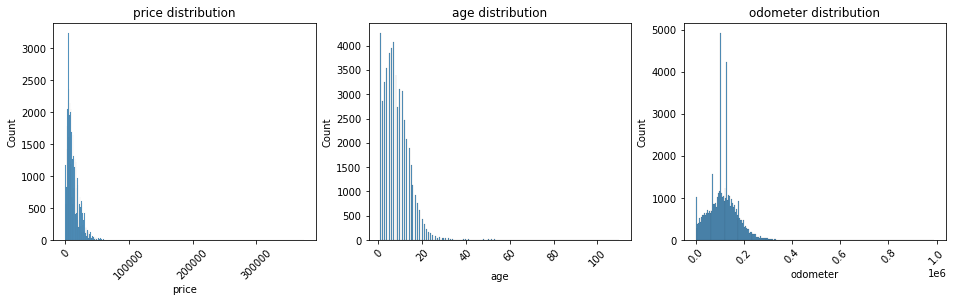

In [617]:
# memuat histogram untuk parameter: harga, usia, jarak tempuh
create_histplot(car_ads, parameter_numeric)

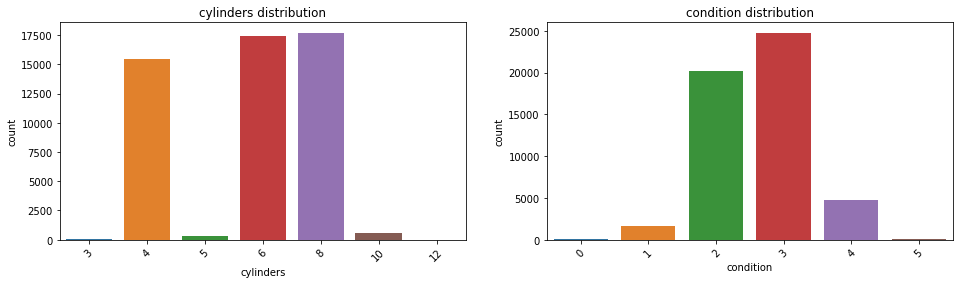

In [618]:
# memuat countplot untuk parameter: silinder dan kondisi
create_countplot(car_ads, parameter_category)

## Mempelajari dan Menangani Outlier

Dari grafik di atas, dapat dilihat bahwa kolom price, age, dan odometer memiliki outliers. Sedangkan Cylinders tidak.

Langkah selanjutnya mendefinisikan outliers dan menyaringnya dari data.

In [619]:
# mendefinisikan fungsi untuk menentukan batas bawah dan atas outlier berdasarkan Q1 dan Q3
def bound(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

In [620]:
# membuat fungsi membersihkan outliers
def filter_outlier(df, column, lower_bound, upper_bound):
    if lower_bound < 0:
        lower_bound = 0

    # Clean Outlier to the bounds
    df = df.loc[(df[column] < upper_bound) & (df[column] > lower_bound)]
    return df

In [621]:
# membuat fungsi yang membersihkan data dari outliers, menggunakan loop
def clean_data(df, columns):
    for column in columns:
        lower_bound = bound(df, column)[0]
        upper_bound = bound(df, column)[1]
        df = filter_outlier(df, column, lower_bound, upper_bound)
    return df

In [622]:
# Membuat data yang clean dengan menerapkan fungsi clean_data
columns = ('price', 'age', 'odometer')
car_ads_clean = clean_data(df=car_ads, columns=columns)


In [623]:
# Memuat deskripsi statistik data yang clean dari outiers
car_ads_clean.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000
mean,11273.531047,2010.141095,2.639060,6.051011,113819.105080,39.539250,15.454843,6.632694,2018.306568,8.198451,18798.411014
std,7836.391772,4.965727,0.697721,1.656933,52531.716484,28.207371,8.740585,3.472197,0.461073,4.927496,15395.192234
min,1.000000,1995.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2018.000000,1.000000,0.052632
25%,5000.000000,2007.000000,2.000000,4.000000,79000.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10596.750000
50%,8995.000000,2011.000000,3.000000,6.000000,112000.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,14928.461538
75%,15995.000000,2014.000000,3.000000,8.000000,146000.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21584.125000
max,34595.000000,2019.000000,5.000000,12.000000,253000.000000,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000


## Mempelajari Parameter Inti Tanpa Outlier

Dengan data yang telah dibersihkan dari outliers, histogram, countplot, dan boxplot akan dibuat.

In [624]:
# memuat deskripsi statistik data aslinya
car_ads.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,39.55476,15.449491,6.628491,2018.307462,8.555672,18930.822069
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,28.20427,8.736521,3.474134,0.461447,6.057829,16268.514686
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,15.000000,7.000000,2018.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000


In [625]:
# memuat deskripsi statistik setelah data difilter outlier
car_ads_clean.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000
mean,11273.531047,2010.141095,2.639060,6.051011,113819.105080,39.539250,15.454843,6.632694,2018.306568,8.198451,18798.411014
std,7836.391772,4.965727,0.697721,1.656933,52531.716484,28.207371,8.740585,3.472197,0.461073,4.927496,15395.192234
min,1.000000,1995.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,2018.000000,1.000000,0.052632
25%,5000.000000,2007.000000,2.000000,4.000000,79000.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10596.750000
50%,8995.000000,2011.000000,3.000000,6.000000,112000.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,14928.461538
75%,15995.000000,2014.000000,3.000000,8.000000,146000.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21584.125000
max,34595.000000,2019.000000,5.000000,12.000000,253000.000000,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000


In [626]:
# memuat info data setelah filter outlier
car_ads_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47911 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              47911 non-null  int64         
 1   model_year         47911 non-null  int64         
 2   model              47911 non-null  object        
 3   condition          47911 non-null  int64         
 4   cylinders          47911 non-null  int64         
 5   fuel               47911 non-null  object        
 6   odometer           47911 non-null  float64       
 7   transmission       47911 non-null  object        
 8   type               47911 non-null  object        
 9   paint_color        47911 non-null  object        
 10  is_4wd             47911 non-null  bool          
 11  date_posted        47911 non-null  datetime64[ns]
 12  days_listed        47911 non-null  int64         
 13  day_name_posted    47911 non-null  object        
 14  day_po

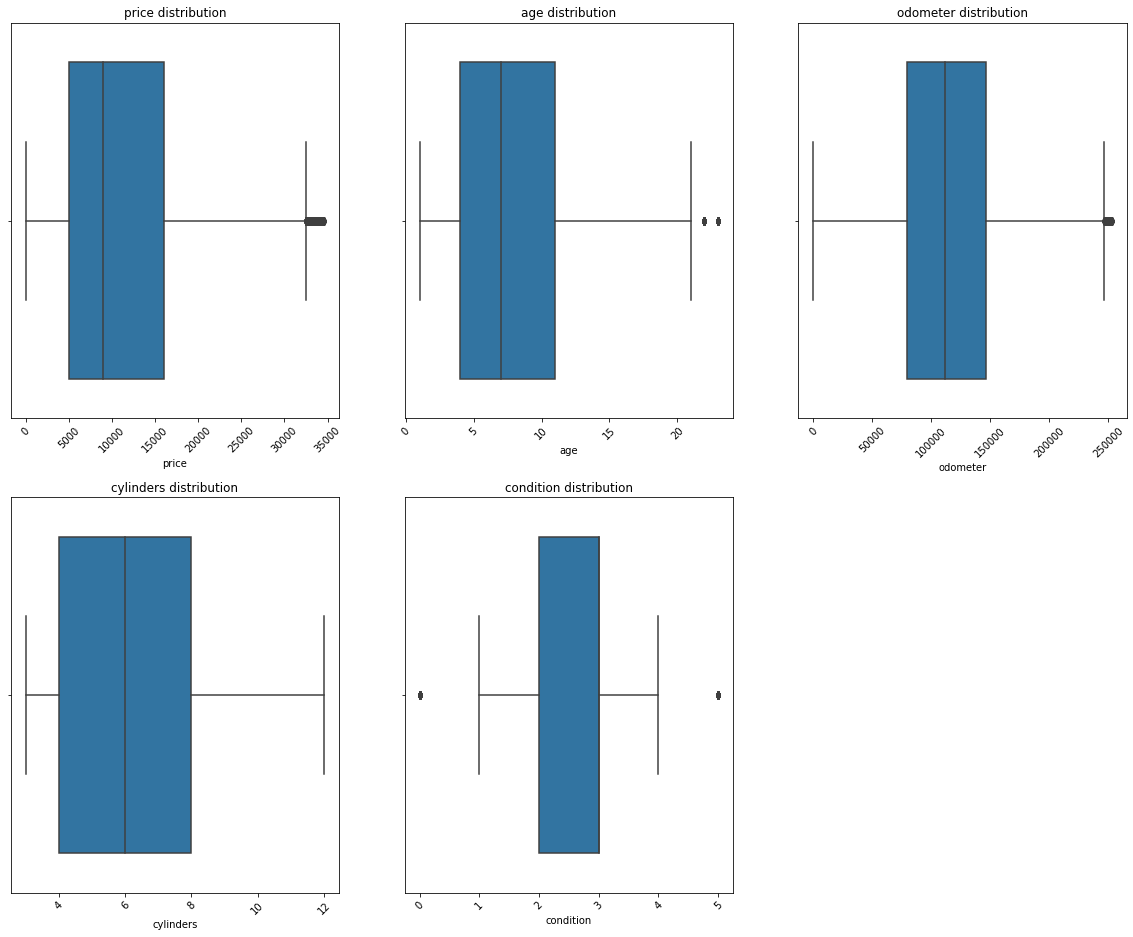

In [627]:
# memuat boxplot untuk setiap parameter menggunakan fungsi create_boxplot
create_boxplot(car_ads_clean, parameters)

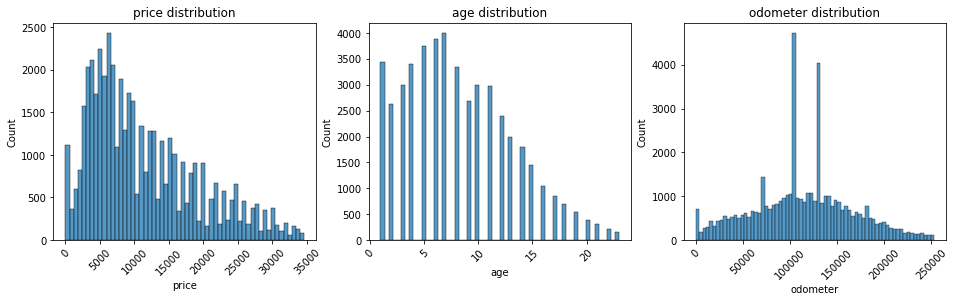

In [628]:
# memuat histogram untuk parameter: harga, usia, jarak tempuh
create_histplot(car_ads_clean, parameter_numeric)

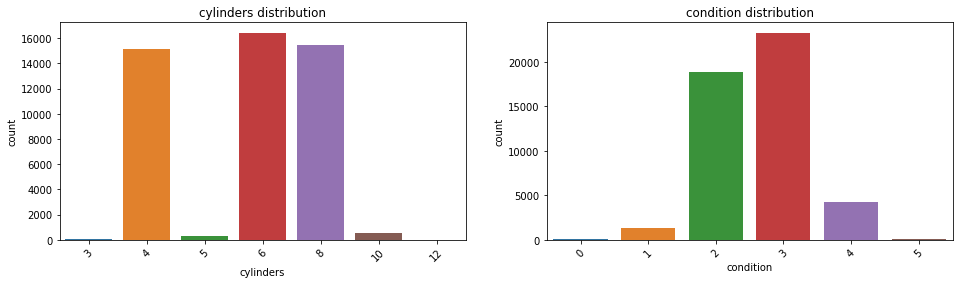

In [629]:
# memuat countplot untuk parameter: silinder dan kondisi
create_countplot(car_ads_clean, parameter_category)

Setelah filter outlier pada parameter price, age, dan odometer, jumlah dan distribusi data berubah. Mean, median, Q1 dan Q3 telah bergeser. 

Dari boxplot, terlihat bahwa parameter price, age dan odometer sekarang memilki lebih sedikit outliers.

## Masa Berlaku Iklan 
Berikutnya mempelajari berapa hari umumnya iklan ditayangkan (`days_listed`)

In [630]:
# memuat deskripsi statistik lama hari iklan ditayangkan
car_ads_clean['days_listed'].describe()

count    47911.000000
mean        39.539250
std         28.207371
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

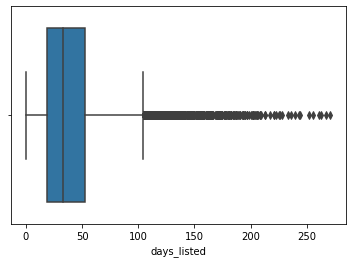

In [631]:
# memuat boxplot untuk lama hari iklan ditayangkan
sns.boxplot(car_ads_clean['days_listed'])

Umumnya iklan ditayangkan selama sekitar 33 sampai 40 hari. Iklan turun tayang paling cepat pada hari yang sama ketika ditayangkan, dan paling lama setelah 271 hari. Sedangkan kuartil 3 (Q3) adalah 53 hari. 

## Harga Rata-Rata Setiap Jenis Kendaraan

Berikutnya menganalisa jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan akan dibuat.

In [632]:
# memuat pivot data banyaknya iklan dan harga rata-rata berdasarkan tipe mobil
car_ads_type = car_ads_clean.pivot_table(index='type', values=['model','price'], 
                                         aggfunc = ['mean', 'count'])
car_ads_type

mean  count       
                    price  model  price
type                                   
SUV          10487.598410  11823  11823
bus          18107.428571     21     21
convertible  13046.598240    341    341
coupe        13565.540419   2004   2004
hatchback     6828.041000   1000   1000
mini-van      8072.185802   1141   1141
offroad      14344.049451    182    182
other        10602.698690    229    229
pickup       15155.138724   6221   6221
sedan         6987.910753  11922  11922
truck        15216.104573  10978  10978
van           8892.730435    575    575
wagon         9019.019674   1474   1474

In [633]:
# mengubah nama kolom hasil pivot table
car_ads_type.columns = ('price_avg', 'ads_count', 'price_count')
car_ads_type

,price_avg,ads_count,price_count
type,,,
SUV,10487.598410,11823,11823
bus,18107.428571,21,21
convertible,13046.598240,341,341
coupe,13565.540419,2004,2004
hatchback,6828.041000,1000,1000
mini-van,8072.185802,1141,1141
offroad,14344.049451,182,182
other,10602.698690,229,229
pickup,15155.138724,6221,6221


In [634]:
# menyimpan data banyaknya iklan dan harga rata-rata berdasarkan tipe mobil
car_ads_type = car_ads_type[['ads_count', 'price_avg']].sort_values('ads_count', ascending=False).reset_index()
car_ads_type


,type,ads_count,price_avg
0,sedan,11922,6987.910753
1,SUV,11823,10487.598410
2,truck,10978,15216.104573
3,pickup,6221,15155.138724
4,coupe,2004,13565.540419
5,wagon,1474,9019.019674
6,mini-van,1141,8072.185802
7,hatchback,1000,6828.041000
8,van,575,8892.730435
9,convertible,341,13046.598240


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

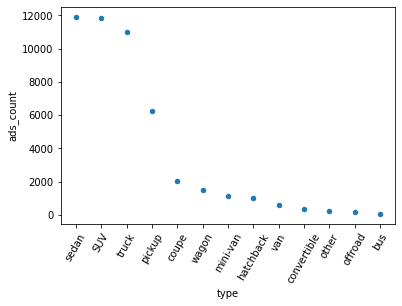

In [635]:
# memuat scatter plot menunjukkan hubungan jumlah iklan dengan jenis kendaraan
car_ads_type.plot(x='type', y='ads_count', kind='scatter')
plt.xticks(rotation = 60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

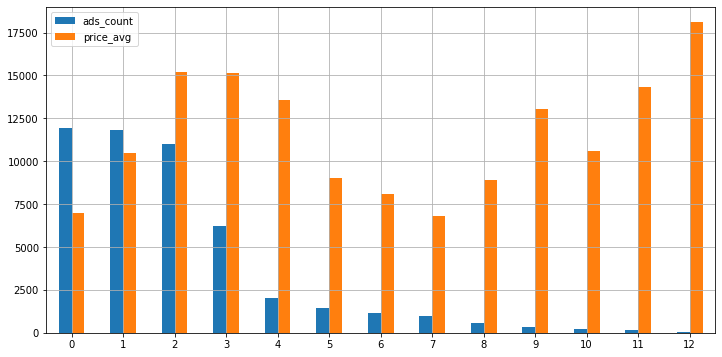

In [636]:
# memuat chart bar untuk menunjukkan hubungan jumlah iklan dan harga rata-rata
car_ads_type.plot(kind='bar', grid=True, figsize=(12,6))
plt.ylabel
plt.xticks(rotation = 0)

Tipe kendaraan yang paling banyak diiklankan adalah sedan dan SUV. Yang paling sedikit adalah bus. 

Di lain sisi, harga yang paling tinggi adalah bus, diikuti oleh pickup.

## Faktor Harga

Tahap ini akan analisa dilakukan untuk menjawab faktor yang paling mempengaruhi harga kendaraan.

Dua jenis kendaraan paling populer yang ditemukan pada tahap sebelumnya akan pelajari. Uji untuk mengetahui apakah harga bergantung pada:
1. Usia
2. Jarak tempuh
3. Kondisi
4. Tipe transmisi
5. Warna. 

Grafik akan dibuat, yaitu *boxplot* untuk variabel kategorik (jenis transmisi dan warna), dan *scatterplot* untuk sisanya. 

Dalam analisis variabel kategorik, hanya kategori yang memiliki setidaknya sebanyak Q3, atau 50 iklan yang akan dilibatkan. Jika tidak, parameternya tidak dianggap valid untuk digunakan saat analisis.

Matriks korelasi dan plot korelasi. Pertama, EDA dilakukan untuk tipe sedan

In [637]:
# mengiris data hanya untuk tipe sedan
car_ads_sedan = car_ads_clean.query('type == "sedan"').reset_index(drop=True)
car_ads_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
1,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000
2,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,20,6,June,2018,4,14488.500000
3,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,27,12,December,2018,3,26404.000000
4,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,Thursday,28,3,March,2019,7,15877.428571


In [638]:
# memuat matrik korelasi harga tipe sedan
car_ads_sedan.corr()['price']

price              1.000000
model_year         0.617299
condition          0.291461
cylinders         -0.045236
odometer          -0.523802
is_4wd             0.040093
days_listed        0.001278
day_posted         0.005391
month_posted      -0.017951
year_posted        0.015632
age               -0.611641
odometer_annual    0.306564
Name: price, dtype: float64

Text(0.5, 1.0, 'Sedan: correlation between odometer and price')

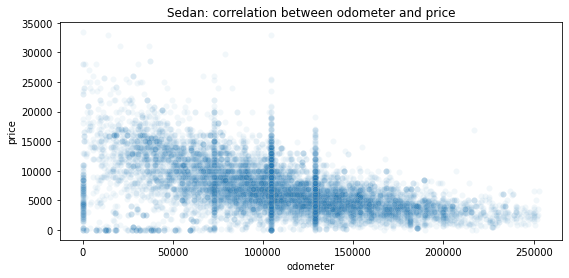

In [639]:
# memuat scatterplot korelasi odometer terhadap price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_sedan, x='odometer', y='price', alpha=0.06)
plt.title('Sedan: correlation between odometer and price')


Text(0.5, 1.0, 'Sedan: correlation between condition and price')

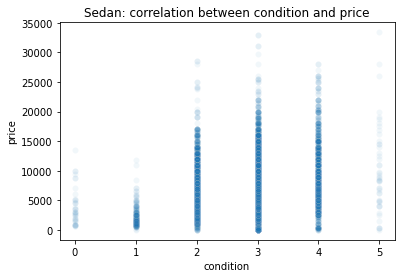

In [640]:
# memuat scatterplot condition terhadap price
sns.scatterplot(data=car_ads_sedan, x='condition', y='price', alpha=0.06)
plt.title('Sedan: correlation between condition and price')

Text(0.5, 1.0, 'Sedan: correlation between age and price')

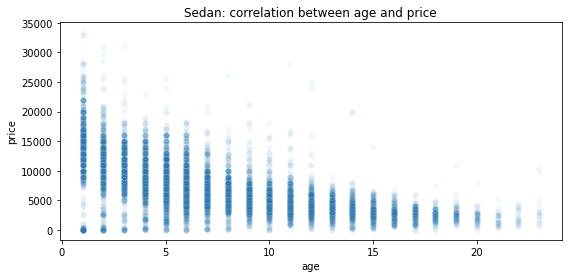

In [641]:
# memuat scatterplot age terhadap price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_sedan, x='age', y='price', alpha=0.06)
plt.title('Sedan: correlation between age and price')

In [642]:
# memeriksa distribusi nilai unik transmisi
car_ads_sedan['transmission'].value_counts()

automatic    11221
manual         573
other          128
Name: transmission, dtype: int64

Text(0.5, 1.0, 'Sedan: correlation between transmission and price')

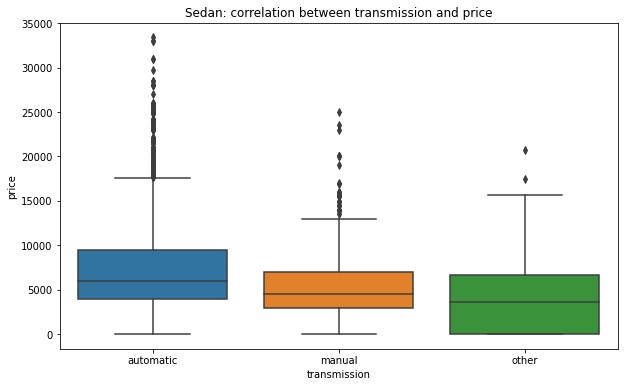

In [643]:
# memuat boxplot korelasi transmisi dan harga
plt.figure(figsize=(10,6))
sns.boxplot(data=car_ads_sedan, x='transmission', y='price')
plt.title('Sedan: correlation between transmission and price')

In [644]:
# memuat nilai unik paint_color
car_ads_sedan['paint_color'].value_counts()

unknown    2147
silver     2021
black      1746
grey       1603
white      1477
blue       1209
red         926
custom      292
brown       251
green       197
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

In [645]:
# menyimpan list nilai paint_color yang jumlah iklannya setidaknya 50
list_colors = list((car_ads_sedan['paint_color'].value_counts() >= 50).index)
list_colors

['unknown',
 'silver',
 'black',
 'grey',
 'white',
 'blue',
 'red',
 'custom',
 'brown',
 'green',
 'purple',
 'yellow',
 'orange']

In [646]:
# menyimpan data tipe sedan dengan paint colors yang jumlah iklannya setidaknya 50
car_ads_sedan_color = car_ads_sedan.loc[car_ads_sedan['paint_color'].isin(list_colors)]
car_ads_sedan_color.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
1,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000
2,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,20,6,June,2018,4,14488.500000
3,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,27,12,December,2018,3,26404.000000
4,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,Thursday,28,3,March,2019,7,15877.428571


Text(0.5, 1.0, 'Sedan: correlation between paint_color and price')

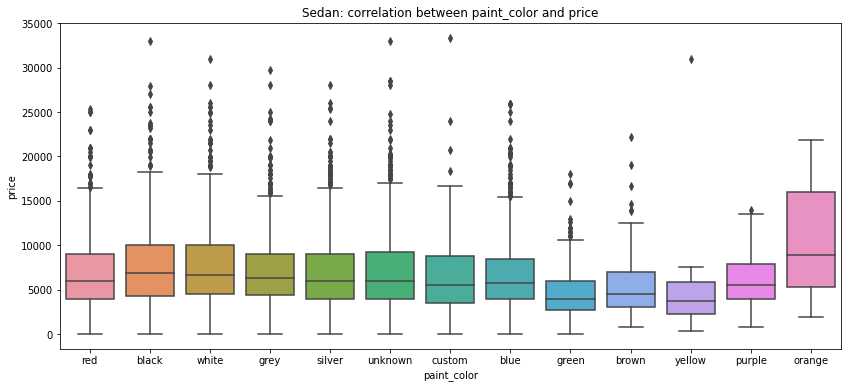

In [647]:
# memuat boxplot korelasi paint_color dan price
plt.figure(figsize=(14,6))
sns.boxplot(data=car_ads_sedan_color, x='paint_color', y='price')
plt.title('Sedan: correlation between paint_color and price')

Selanjutnya EDA dilakukan untuk tipe SUV

In [648]:
# mengiris data hanya untuk tipe SUV
car_ads_suv = car_ads_clean.query('type == "SUV"').reset_index(drop=True)
car_ads_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,7,1,January,2019,6,18245.500000
2,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,16,7,July,2018,6,17362.333333
3,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,15,2,February,2019,11,13381.000000
4,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,Thursday,31,1,January,2019,10,13228.500000


In [649]:
# memuat matrik korelasi harga tipe SUV
car_ads_suv.corr()['price']

price              1.000000
model_year         0.575012
condition          0.259936
cylinders          0.004478
odometer          -0.489096
is_4wd             0.113930
days_listed       -0.020743
day_posted         0.001570
month_posted      -0.007052
year_posted        0.001110
age               -0.574718
odometer_annual    0.271922
Name: price, dtype: float64

Text(0.5, 1.0, 'SUV: correlation between odometer and price')

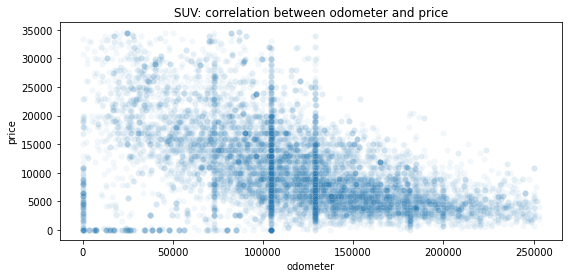

In [650]:
# memuat scatterplot korelasi odometer terhadap price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_suv, x='odometer', y='price', alpha=0.06)
plt.title('SUV: correlation between odometer and price')

Text(0.5, 1.0, 'SUV: correlation between condition and price')

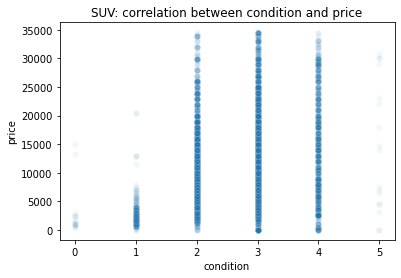

In [651]:
# memuat scatterplot condition terhadap price
sns.scatterplot(data=car_ads_suv, x='condition', y='price', alpha=0.06)
plt.title('SUV: correlation between condition and price')

Text(0.5, 1.0, 'SUV: correlation between age and price')

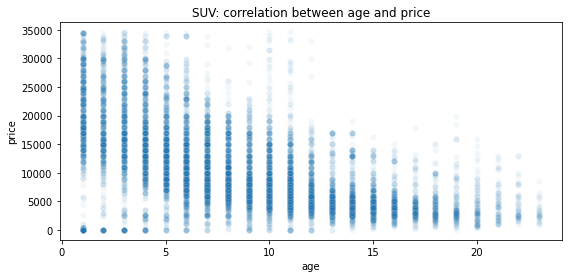

In [652]:
# memuat scatterplot age terhadap price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_suv, x='age', y='price', alpha=0.06)
plt.title('SUV: correlation between age and price')

In [653]:
# memeriksa distribusi nilai unik transmisi
car_ads_suv['transmission'].value_counts()

automatic    11210
manual         456
other          157
Name: transmission, dtype: int64

Text(0.5, 1.0, 'SUV: correlation between transmission and price')

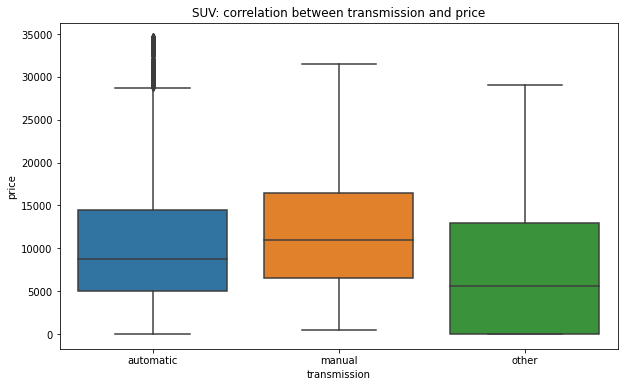

In [654]:
# memuat boxplot korelasi transmisi dan harga
plt.figure(figsize=(10,6))
sns.boxplot(data=car_ads_suv, x='transmission', y='price')
plt.title('SUV: correlation between transmission and price')

In [655]:
# memuat nilai unik paint_color
car_ads_suv['paint_color'].value_counts()

unknown    2130
black      2080
white      1857
silver     1525
grey       1144
blue       1006
red         867
green       407
brown       350
custom      296
orange       81
yellow       43
purple       37
Name: paint_color, dtype: int64

In [656]:
# menyimpan list nilai paint_color yang jumlah iklannya setidaknya 50
list_colors = list((car_ads_suv['paint_color'].value_counts() >= 50).index)
list_colors

['unknown',
 'black',
 'white',
 'silver',
 'grey',
 'blue',
 'red',
 'green',
 'brown',
 'custom',
 'orange',
 'yellow',
 'purple']

In [657]:
# menyimpan data tipe sedan dengan paint colors yang jumlah iklannya setidaknya 50
car_ads_suv_color = car_ads_suv[car_ads_suv['paint_color'].isin(list_colors)]
car_ads_suv_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,7,1,January,2019,6,18245.500000
2,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,16,7,July,2018,6,17362.333333
3,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,15,2,February,2019,11,13381.000000
4,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,Thursday,31,1,January,2019,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11818,9500,2012,chevrolet traverse,2,6,gas,144500.0,automatic,SUV,unknown,True,2019-03-05,1,Tuesday,5,3,March,2019,7,20642.857143
11819,4999,2002,toyota 4runner,3,6,gas,177901.0,automatic,SUV,unknown,True,2018-05-26,59,Saturday,26,5,May,2018,16,11118.812500
11820,6995,2012,buick enclave,3,6,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,Saturday,4,8,August,2018,6,26166.666667
11821,7995,2011,chevrolet equinox,4,4,gas,111088.0,automatic,SUV,unknown,False,2019-04-01,175,Monday,1,4,April,2019,8,13886.000000


Text(0.5, 1.0, 'SUV: correlation between paint_color and price')

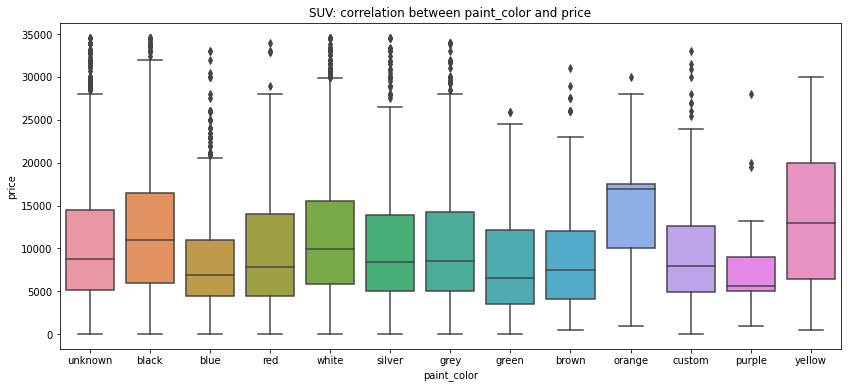

In [658]:
# memuat boxplot korelasi paint_color dan price
plt.figure(figsize=(14,6))
sns.boxplot(data=car_ads_suv_color, x='paint_color', y='price')
plt.title('SUV: correlation between paint_color and price')

## Kesimpulan Akhir

Pertama, data diproses dengan memeriksa dan menangani nilai hilang. Kolom dengan nilai hilang seperti model_year dan cylinders digantikan median yang didasarkan pada parameter lain, yaitu model. Tujuannya adalah agar pengisian nilai hilang tidak membuat distribusi data bergeser terlalu banyak. Sedangkan untuk kolom odometer, nilai hilangnya diisi dengan median berdasarkan condition. Lalu pada kolom paint_color, nilai hilang diisi dengan unknown.

Kemudian tipe data diubah agar sesuai dengan sifat datanya. Tahun mobil, jumlah silinder diubah menjadi integer. Dan tanggal iklan diubah menjadi datetime.

Lalu kolom baru dibuat agar analisa bisa dilakukan, seperti menambahkan tahun iklan ditayangkan agar usia mobil saat iklan ditayangkan dapat dihitung. Selain itu juga beberapa kolom ditambahkan dengan tujuan agar data dapat dimengerti lebih baik, seperti hari iklan ditayangkan, bulan iklan ditayangkan.

Lalu data di kolom kondisi diubah menjadi numerik yang merepresentasikan kategori ordinal. Ini dilakukan agar analisa dapat lebih mudah dilakukan.

Selanjutnya dari hasil EDA terhadap 2 tipe mobil yang paling banyak diiklankan, yaitu sedan dan SUV, beberapa kesimpulan didapatkan:

1. Korelasi antara jarak tempuh dan harga adalah berbanding terbalik, dengan kekuatan korelasi sekitar 0.5
2. Korelasi antara usia dan harga adalah berbanding terbalik, dengan kekuatan korelasi sekitar 0.6
3. Korelasi antara kondisi dan harga adalah berbanding lurus, dengan hubungan yang tidak terlalu kuat
4. Untuk tipe sedan, transmisi automatic biasanya dijual dengan harga lebih mahal dibanding transmisi lainnya. Sedangkan untuk SUV, transmisi manual.
5. Warna orange biasanya dijual dengan harga lebih mahal dibanding warna lainnya. Sedangkan warna green adalah yang lebih murah.